# 統計指標實作範例
## 常見於迴歸問題的評估指標
* 平均絕對誤差 - Mean Absolute Error (MAE)
* 平均平方誤差(均方差) - Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

# [教學目標]
- 開始的第一堂課 : 我們先一些機器學習的基礎開始, 需要用到一些 Python 語法  
- 如果不熟 Python, 但是至少熟悉過一門語言, 可以從這些範例開始熟悉
- 所謂評價函數 (Metric), 就是機器學習的計分方式, 範例會展示平均絕對誤差 (MAE) 的寫法
- 我們來了解意義並寫作一個函數吧!!

# [範例重點]
- 複習 / 熟悉 Python 載入套件的語法, 了解什麼是代稱 (In[1], Out[1])
- 了解 Python 如何使用 Numpy 套件, 計算我們所需要的數值與繪圖 (In[2], Out[2], In[3], Out[3])
- 如何寫作平均絕對誤差 (MAE) 函數 (In[4], Out[4])

In [1]:
# import 是 Python 載入套件的基本語法 (類似 C 語言的 include), 後面接要載入的套件
# import AAAAA as BB, 其中 BB 是代稱, 表示除了載入 AAAAA 之外, 之後都可以用 BB 代替 AAAAA 這個名稱
# 常用套件往往有其對應代稱, numpy的代稱是np, pandas的代稱是pd, matplotlib.pyplot的代稱是plt
# numpy 常用於數值/陣列運算, pandas 擅長資料格式的調整, matplotlib 擅長繪圖
import numpy as np
import matplotlib.pyplot as plt

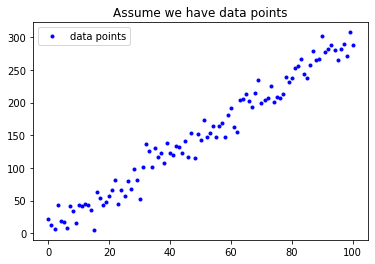

In [2]:
# Python 的變數不須宣告, 可能是文字, 數值, 陣列, 甚至是物件, 對初學者來說這往往是最難接受的地方
# 主要是 Python 在大多數情況下, 可以由運算"猜"出你想要的型態, 我們由下列語法看看發生了什麼事吧
# w, b 是數值
w = 3
b = 0.5

# np.linspace 是 numpy.linspace 的意思
# np.linspace(0, 100, 101)是指 0~100 劃分成 101 個刻度(含頭尾), 所也就是 0, 1, 2,...,100 這 101 個數
# 這時候, x_lin 因為要記錄不只一個數, 因為 np.linspace() 傳回的是一個 Array, 所以 x_lin 就變成 Array 了
x_lin = np.linspace(0, 100, 101)

# np.random.randn() 就是 numpy.random.randn(), 會隨機傳回標準常態分布的取樣值
# np.random.randn(101) 表示取樣了101次, 型態是 Array, 所以其他 + 與 * 的部分都是 Array 的加與乘, 一行就計算了101筆資料
# 所以最後的結果 y, 也是一個長度 101 的 Array
y = (x_lin + np.random.randn(101) * 5) * w + b

# 這邊就是將 x_lin 以及剛剛算完的 y, 當作座標值, 將101個點在平面上畫出來
# b. : b 就是 blue, 點(.) 就是最小單位的形狀, 詳細可以查 matplotlib 的官方說明
plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

In [3]:
x_lin

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [4]:
y

array([ 21.45183337,  13.14533366,   6.21013902,  42.93814241,
        19.16486101,  17.56104681,   7.8404042 ,  40.89319871,
        33.62117304,  15.14304905,  43.43079152,  41.8000004 ,
        44.49624734,  43.72702188,  35.33229094,   4.99375655,
        62.75512034,  54.20088513,  42.99700121,  48.00843963,
        57.0248348 ,  66.00233307,  81.42072002,  45.36399372,
        65.90693421,  56.41478385,  80.66063799,  67.27577805,
        97.76950375,  82.0944759 ,  52.08371915, 101.76097415,
       135.96362943, 125.5690188 , 102.00800201, 130.60144977,
       116.55858717, 123.02643274, 107.29821645, 137.77597423,
       122.63291095, 119.82666092, 133.37814998, 131.50681461,
       122.54097565, 141.00132363, 116.97748323, 152.70124868,
       114.99649055, 151.25103738, 143.02471556, 173.49727009,
       146.60867727, 154.08314   , 164.1647285 , 147.08438479,
       163.81717247, 169.10054154, 146.83743233, 181.59164473,
       191.95192285, 163.34076057, 155.4664093 , 203.98

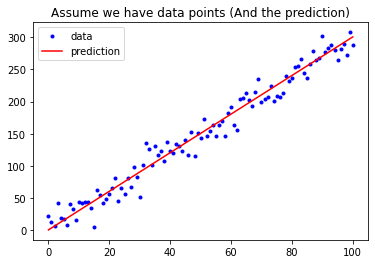

In [5]:
# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [6]:
y_hat

array([  0.5,   3.5,   6.5,   9.5,  12.5,  15.5,  18.5,  21.5,  24.5,
        27.5,  30.5,  33.5,  36.5,  39.5,  42.5,  45.5,  48.5,  51.5,
        54.5,  57.5,  60.5,  63.5,  66.5,  69.5,  72.5,  75.5,  78.5,
        81.5,  84.5,  87.5,  90.5,  93.5,  96.5,  99.5, 102.5, 105.5,
       108.5, 111.5, 114.5, 117.5, 120.5, 123.5, 126.5, 129.5, 132.5,
       135.5, 138.5, 141.5, 144.5, 147.5, 150.5, 153.5, 156.5, 159.5,
       162.5, 165.5, 168.5, 171.5, 174.5, 177.5, 180.5, 183.5, 186.5,
       189.5, 192.5, 195.5, 198.5, 201.5, 204.5, 207.5, 210.5, 213.5,
       216.5, 219.5, 222.5, 225.5, 228.5, 231.5, 234.5, 237.5, 240.5,
       243.5, 246.5, 249.5, 252.5, 255.5, 258.5, 261.5, 264.5, 267.5,
       270.5, 273.5, 276.5, 279.5, 282.5, 285.5, 288.5, 291.5, 294.5,
       297.5, 300.5])

In [4]:
# Python 的函數是另一個新手上手的困難點, 由def開頭, 依序是函數名稱 / 輸入值, 冒號(:)結尾
# 最難讓人習慣的是 Python 的函式與條件判斷, 前後都沒有大括弧(其他程式常見), 而是以四格空白縮排來取代
# 以本例來說, mean_absolute_error 這個函數的定義範圍到 return mae 為止, 因為中間都是縮排, 而 """ 是多行註解(井號是單行註解)
# 函數中, sum(), abs(), len() 都是 Python 原有的方法, 因此可以直接呼叫
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    # MAE : 將兩個陣列相減後, 取絕對值(abs), 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"平均絕對誤差"
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE
MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 11.529


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [7]:
def mean_squared_error(y1,y2):
    mse = sum((y1-y2)**2)/len(y1)
    return mse